In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Описание задачи
Перед вами данные из невыпущенной мобильной f2p игры под названием "Bee Quest" (далее BQ). BQ – игра в жанре "ферма с экспедициями". Перед игроком ставится задача развивать свою ферму и увеличивать количество пчёл, которые могут там жить. Пчёл можно отправлять в "экспедиции" – приключенческие локации, на которых пчёлы выполняют задания и добывают ценные ресурсы для развития фермы. 

Основной ресурс для развития фермы – мёд, который добывается внутри фермы. Мёд можно докупать за ресурс "пчелиный кэш" (очень редкий ресурс, благодать пчеломатки). Так же за пчелиный кэш можно докупать домики для фермы напрямую и покупать косметические предметы для пчёл – стилизованные жала и усики. И мёд, и пчелиный кэш можно докупить в игровом магазине за реальные деньги – на этом строится бизнес-модель игры BQ.

Вы – аналитик игры "Bee Quest". За неделю до начала пандемии ковида команда User Acquisition открыла доступ к первому билду игры в сторах и запустила маркетинговую кампанию, чтобы оценить стартовые метрики. Кампания какое-то время привлекала пользователей, а потом началась пандемия и работу над BeeQuest приостановили, потому что всем было не до этого.

Спустя 4 месяца команда заработала в прежнем режиме (но уже удаленно), и руководитель BeeQuest пришел к вам в личку с задачей:

```

{username}, привет!

Мы решили, что стартовые метрики BeeQuest нас устраивают, и хотим снова привлекать туда пользователей через рекламу. Ребята из маркетинга подготовили классные креативы, отдел ASO заверстал крутые скриншоты для магазинов приложений, а геймдизайнеры подготовили контент-план на полгода вперед. Все готово, чтобы BeeQuest стал бизнесом с солидными тратами на маркетинг. Мы собираемся продвигать игру во всех основных социальных сетях.

Осталась только одна проблема – мы не понимаем, какой у BeeQuest LTV. Эта информация нужна маркетингу чтобы в моменте принимать решения о том, окупится ли привлеченный трафик и стоит ли продолжать тратить деньги на рекламную кампанию. Логика у них простая – если мы видим, что прогноз выручки с привлеченных игроков больше маркетинговых затрат, то мы продолжаем привлекать пользователей и тратить деньги. Если наоборот, ожидаемая выручка меньше затрат – приостанавливаем работу с этим каналом и переходим на другой. Соответственно чем раньше мы это поймем – тем быстрее примем решение о закрытии неэффективных каналов / увеличении бюджета эффективных.

Нам необходима система, которая будет предсказывать LTV игроков + инструкция для маркетинга, как ей пользоваться. В качестве LTV мы сейчас используем меру "выручка за 120 дней после регистрации". 


```

Вам, как аналитику, нужно решить две задачи:

* Собрать систему, которая будет прогнозировать выручку игроков за 120 дней после регистрации. Решение может быть в любом виде – как вы сами посчитаете, как будет эффективнее для решения поставленной руководителем задачи.
* Написать короткий алгоритм её внедрения и использования – как менеджеру понять, что делать и куда смотреть

Что необходимо прислать в качестве ответа:

* Логическое описание решения, приложенный код и результаты тестов
* Короткую записку о том, что нужно сделать, чтобы система встроилась в работу отдела маркетинга

Для сборки системы у вас есть исторические данные о поведении игроков, которые пришли по доковидной закупке. В архиве есть 1 csv-файл, ниже его описание. 

Ответ можно прикладывать в любом виде, достаточном для того, чтобы открыть его без стороннего PO – например, подойдет юпитер-ноутубук, сохранённый в HTML.

//––––––––––––––––––


******** Таблица "task" ********



* `id`		– уникальный идентификатор пользователя
* `cc`    	– страна регистрации пользователя
* `eventId`    – уникальный идентификатор события, о них ниже
* `eventSar`    – количество секунд, которое прошло от момента первого запуска игры пользователем до этого события
* `eventValue`	– значение, которое присваивается определенному событию `eventId`

/*
	eventId == 1: Событие логина. Пишется каждый раз, когда игрок запускает мобильный клиент.
	`eventValue` - по умолчанию 0
*/

/*
	eventId == 2: Событие платежа. Пишется каждый раз, когда игрок совершает покупку в игре.
	`eventValue` - сумма денег, которую пользователь заплатил за внутриигровые ресурсы (купил пчелиный кэш в кассе, мёд, праздничные усики итд.)
*/

/*
	eventId == 3: Событие получения уровня в игре. Пишется каждый раз, когда игрок получает новый уровень.
	`eventValue` - соответствующий новый уровень фермы
*/

/*
	eventId == 4: Событие окончания туториала (обучения). Пишется один раз, когда игрок заканчивает туториал.
	`eventValue` - по умолчанию 1.
*/

/*
	eventId == 5: Событие получения выручки за просмотр рекламы. Пишется каждый раз, когда игрок посмотрел рекламу в игре.
	`eventValue` - сумма денег, которая была получена за просмотр пользователем рекламы.
*/




## Изначальные рассуждения
1. Мы зарабатываем на внутриигровых покупках, а также на просмотрах рекламы. То есть если пользователь ничего не покупает, но смотрит много рекламы - это тоже выгодно для нас.
2. У нас нет поля с датой. Мы видим события относительно начальной точки для каждого пользователя, но не можем проанализировать по календарю. То есть, если в каком-то конкретном месяце мы привели классных клиентов, то мы их не сможем выделить.
3. Предполагаю, что те данные, которые мы имеем, соответствуют периоду закупки рекламы. Иначе они могут быть не совсем релевантными
4. Если мы предполагаем значительное изменение бюджета, то эффект от него может быть нелинейным и в данном кейсе оценить его не сможем
5. Нужно ответить на вопрос на какой момент времени (на какой срез) мы делаем прогноз. То есть спустя сколько времени после регистрации (на 30 день или на 60?). В задаче сказано "чем раньше - тем лучше". По хорошему, эту постановку необходимо оцифровать и перевести в деньги. Чем раньше делаем прогноз - тем меньше точность и выше вероятность что мы будем тратить деньги на тех пользователей, на которых не нужно и не тратить на потенциальных. В идеальной картине мира нам нужно найти ту самую точку экономической эффективности для минимизации издержек и максимизации прибыли, но это возможно сделать только имея затраты на пользователей.  
В нашей постановке попробуем найти оптимальный горизонт по паретто чтобы обеспечить 80% от максимальной точности как можно раньше.
6. Предполагаю что в выборке нет новых клиентов. Например тех, которые зашли в игру месяц назад. Считаю что мы смотрим на клиентов, не моложе 120 дней.

In [2]:
# Загружаем данные
data_df = pd.read_csv('/kaggle/input/nxtr-tst/task.csv')

## Посмотрим на сами данные

In [3]:
# Выбираем рендомные строчки
data_df.sample(10)

,id,cc,eventId,eventSar,eventValue
318962,464e1660-aa2b-4550-87fb-52a21adcf695,TH,1,650092,0.00000
795379,06743d5c-1972-45ff-8a7b-23170e317735,KH,1,2,0.00000
816094,08207600-b766-477e-8c51-344f30fb1b90,IT,1,2103694,0.00000
299022,ebc4b78f-d87b-4148-82a5-f8732cba2600,CH,1,10339964,0.00000
529262,81b45692-bc68-4ffa-9f9a-97e111958387,PH,1,7744985,0.00000
1237854,33498cbf-2ab2-44f7-82b2-8e63caf25890,US,1,9508598,0.00000
369560,c60735f7-20b3-4092-96cb-257678e4a602,US,1,769745,0.00000
1286515,7d455b4a-eb19-4936-b361-00e27039c8f1,RU,1,534423,0.00000
1013841,0709c6ee-2212-4183-a2ce-3df7e51235b9,VE,1,773395,0.00000
181186,cc0efbb6-a9b8-44d3-a8c7-db6aaae4a6ad,PH,5,6967610,0.00056


In [4]:
# Посмотрим на типы объектов и на пропуски. По странам есть пропуски.
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1463806 entries, 0 to 1463805
Data columns (total 5 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   id          1463806 non-null  object 
 1   cc          1463561 non-null  object 
 2   eventId     1463806 non-null  int64  
 3   eventSar    1463806 non-null  int64  
 4   eventValue  1463806 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 55.8+ MB


In [5]:
# 245 пропусков по странам. Далее посмотрим по этим пользователям можем ли определить их страну
data_df[data_df['cc'].isna()]

,id,cc,eventId,eventSar,eventValue
56850,824f8b1a-bf80-43a1-a6b9-2490cdef3a5d,NaN,5,134259,0.00297
66174,2f3da3e2-2c15-4f1a-a30c-b5204e26fa6b,NaN,5,566363,0.00182
66175,2f3da3e2-2c15-4f1a-a30c-b5204e26fa6b,NaN,5,652763,0.00103
66176,2f3da3e2-2c15-4f1a-a30c-b5204e26fa6b,NaN,5,1084763,0.00074
66177,2f3da3e2-2c15-4f1a-a30c-b5204e26fa6b,NaN,5,1343963,0.00039
...,...,...,...,...,...
1442028,2f3da3e2-2c15-4f1a-a30c-b5204e26fa6b,NaN,1,1415135,0.00000
1442384,2f3da3e2-2c15-4f1a-a30c-b5204e26fa6b,NaN,1,1422321,0.00000
1444878,eab77b7c-cc80-475d-9563-17dbf3414f37,NaN,1,1292980,0.00000
1446415,2f3da3e2-2c15-4f1a-a30c-b5204e26fa6b,NaN,1,1330653,0.00000


In [6]:
# Пользователи с неизвестной страной
nan_users = data_df[data_df['cc'].isna()]['id'].unique()

In [7]:
# Непустых значений страны для них нет, то есть не можем подобрать существующую страну
data_df.query('id in @nan_users')

,id,cc,eventId,eventSar,eventValue
56850,824f8b1a-bf80-43a1-a6b9-2490cdef3a5d,NaN,5,134259,0.00297
66174,2f3da3e2-2c15-4f1a-a30c-b5204e26fa6b,NaN,5,566363,0.00182
66175,2f3da3e2-2c15-4f1a-a30c-b5204e26fa6b,NaN,5,652763,0.00103
66176,2f3da3e2-2c15-4f1a-a30c-b5204e26fa6b,NaN,5,1084763,0.00074
66177,2f3da3e2-2c15-4f1a-a30c-b5204e26fa6b,NaN,5,1343963,0.00039
...,...,...,...,...,...
1442028,2f3da3e2-2c15-4f1a-a30c-b5204e26fa6b,NaN,1,1415135,0.00000
1442384,2f3da3e2-2c15-4f1a-a30c-b5204e26fa6b,NaN,1,1422321,0.00000
1444878,eab77b7c-cc80-475d-9563-17dbf3414f37,NaN,1,1292980,0.00000
1446415,2f3da3e2-2c15-4f1a-a30c-b5204e26fa6b,NaN,1,1330653,0.00000


In [8]:
# Преобразуем пустое значение страны в "Not defined"
data_df['cc'] = data_df['cc'].fillna('Not defined')

In [9]:
# пользователи по странам
# Всего 185 стран, больше всего пользователей из US
cc_by_users = data_df.groupby(['cc'])['id'].nunique().reset_index().sort_values('id', ascending=False)

In [10]:
users_num = cc_by_users['id'].sum()
print(f'Total number of users: {users_num}')

Total number of users: 46140


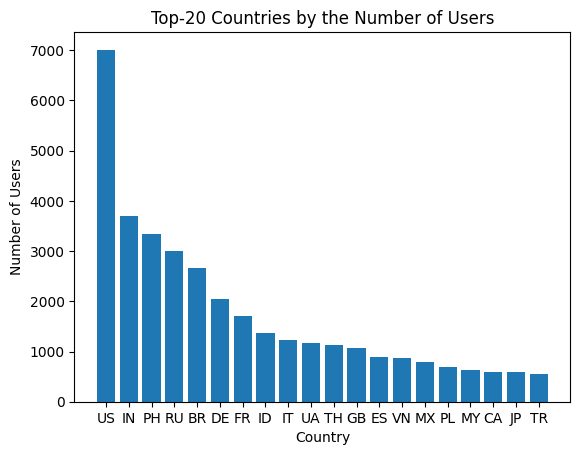

In [11]:
plt.bar(cc_by_users['cc'].head(20), cc_by_users['id'].head(20))
plt.title('Top-20 Countries by the Number of Users')
plt.xlabel('Country')
plt.ylabel('Number of Users')
plt.show()

In [12]:
# посчитаем максимальную дату транзакции для каждого клиента
user_max_time = data_df.groupby(['id'])['eventSar'].max().reset_index(name='max_action_time')

In [13]:
# Добавим расчет жизни клиента в днях
user_max_time['lifespan_days'] = user_max_time['max_action_time'] / (60*60*24)

In [14]:
# Получаем значения не более 120 дней, что сходится с логикой
user_max_time.sort_values('lifespan_days')

,id,max_action_time,lifespan_days
5395,1e12f7bc-32a1-47ff-b59c-1519651d0b84,0,0.000000
43468,f145e1ef-4314-48eb-a55d-5b370cf1f1bb,0,0.000000
26847,94dea67f-c3e3-4949-b9d7-7123cbdaec93,0,0.000000
25382,8c7ffb4a-b6c3-405b-9c8c-47bb4345aac1,0,0.000000
25379,8c79e340-1d9c-44ad-83fd-b912c949d9f6,0,0.000000
...,...,...,...
8864,3150e954-57ab-4bd2-8841-8ff2bb230e6b,10367900,119.998843
42463,ebc4b78f-d87b-4148-82a5-f8732cba2600,10367919,119.999062
23090,7faef865-64af-430a-99d3-12653df0ab77,10367958,119.999514
26518,92f23ad0-b5ea-474f-b674-d619c376c932,10367965,119.999595


array([[<Axes: title={'center': 'lifespan_days'}>]], dtype=object)

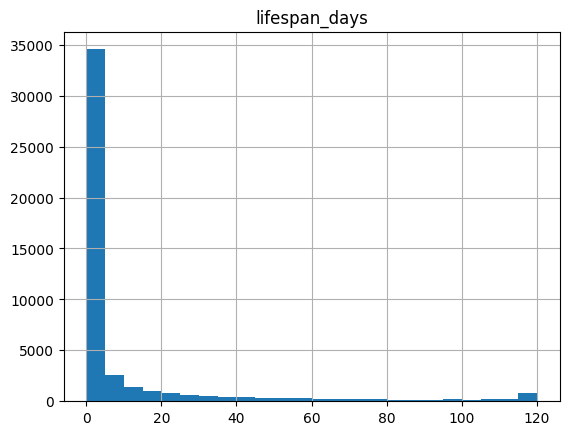

In [15]:
# Подавляющее большинство пользователей с коротким сроком
# мы не знаем ушли они или только пришли из-за отсутствия поля с датой
bins = np.arange(user_max_time['lifespan_days'].min(), user_max_time['lifespan_days'].max() + 5, 5)
user_max_time.hist('lifespan_days', bins=bins)

In [16]:
# Насчитываем признаки транзакций
data_df['login_count'] = np.where(data_df['eventId']==1, 1, 0)
data_df['payment_revenue'] = np.where(data_df['eventId']==2, data_df['eventValue'], 0)
data_df['levelup'] = np.where(data_df['eventId']==3, data_df['eventValue'], 0)
data_df['tutorial_complete'] = np.where(data_df['eventId']==4, 1, 0)
data_df['ad_revenue'] = np.where(data_df['eventId']==5, data_df['eventValue'], 0)

# Создаем фичу для расчета времени первого платежа
data_df['time_first_payment'] = np.where(data_df['eventId']==2, 120*60*60*24 - data_df['eventSar'], 0)

### Насчитаем метрики пользователей

In [17]:
usd_arrg = data_df.groupby('id').agg(
    event_count=('eventSar', 'count'),
    
    max_action_time=('eventSar', 'max'),
    max_lvl=('levelup', 'max'),
    tutorial_complete=('tutorial_complete', 'max'),
    
    ad_revenue=('ad_revenue', 'sum'),
    payment_revenue=('payment_revenue', 'sum'),
    login_count=('login_count', 'sum'),
).reset_index()

usd_arrg['LTV'] = usd_arrg['ad_revenue'] + usd_arrg['payment_revenue']

# Ставим минимальное время жизни равное одному часу чтобы потом нормально посчитать дневные метрики
usd_arrg['max_action_time'] = np.where(usd_arrg['max_action_time']==0, 60*60, usd_arrg['max_action_time'])
usd_arrg['lifespan_days'] = usd_arrg['max_action_time'] / (60*60*24)
usd_arrg['lifespan_days'] = np.ceil(usd_arrg['lifespan_days'])

usd_arrg['levelup_speed'] = usd_arrg['max_lvl'] / usd_arrg['lifespan_days']
usd_arrg['login_per_day'] = usd_arrg['login_count'] / usd_arrg['lifespan_days']
usd_arrg['ad_revenue_per_day'] = usd_arrg['ad_revenue'] / usd_arrg['lifespan_days']
usd_arrg['payment_revenue_per_day'] = usd_arrg['payment_revenue'] / usd_arrg['lifespan_days']
usd_arrg['LTV_per_day'] = usd_arrg['LTV'] / usd_arrg['lifespan_days']
usd_arrg['event_count_per_day'] = usd_arrg['event_count'] / usd_arrg['lifespan_days']

usd_arrg

,id,event_count,max_action_time,max_lvl,tutorial_complete,ad_revenue,payment_revenue,login_count,LTV,lifespan_days,levelup_speed,login_per_day,ad_revenue_per_day,payment_revenue_per_day,LTV_per_day,event_count_per_day
0,000060b9-2bc7-4d2e-8ea5-9395fe517a67,9,64737,6.0,1,0.00000,0.0,3,0.00000,1.0,6.000000,3.000000,0.00000,0.0,0.00000,9.000000
1,00032ae7-e856-407c-8859-0f5217eeeef3,1,7,0.0,0,0.00000,0.0,1,0.00000,1.0,0.000000,1.000000,0.00000,0.0,0.00000,1.000000
2,000614f1-7c6c-42fe-8991-f224d813e19a,116,7762791,14.0,1,0.18992,0.0,95,0.18992,90.0,0.155556,1.055556,0.00211,0.0,0.00211,1.288889
3,0007ea46-0f8e-4c6d-bff9-cf2be238ade0,7,181350,4.0,1,0.00000,0.0,3,0.00000,3.0,1.333333,1.000000,0.00000,0.0,0.00000,2.333333
4,0008b4d3-2197-4136-b45f-2cde5f3ae152,3,168,0.0,0,0.00000,0.0,3,0.00000,1.0,0.000000,3.000000,0.00000,0.0,0.00000,3.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46135,fffbd107-2130-4b3c-ad74-bf7a6c52f09b,6,871,5.0,1,0.00000,0.0,1,0.00000,1.0,5.000000,1.000000,0.00000,0.0,0.00000,6.000000
46136,fffcce94-73e0-40a1-87f0-343f14e447da,1,3,0.0,0,0.00000,0.0,1,0.00000,1.0,0.000000,1.000000,0.00000,0.0,0.00000,1.000000
46137,fffd5f5d-e24c-44af-8885-a9916c14cd90,1,4,0.0,0,0.00000,0.0,1,0.00000,1.0,0.000000,1.000000,0.00000,0.0,0.00000,1.000000
46138,fffda309-2688-452a-ac73-3a45e9e14ef6,15,27802,8.0,1,0.00000,0.0,7,0.00000,1.0,8.000000,7.000000,0.00000,0.0,0.00000,15.000000


In [18]:
avg_usr_payment_rev = usd_arrg['payment_revenue'].mean()
avg_usr_ad_rev = usd_arrg['ad_revenue'].mean()

print(f'Average user pays: {avg_usr_payment_rev}')
print(f'Average user returns in ads: {avg_usr_ad_rev}')

Average user pays: 1.090944115019506
Average user returns in ads: 0.13100885205895105


In [19]:
usd_arrg.sample(10).transpose()

,25223,43086,11317,38699,10945,33182,28634,28072,39369,22164
id,8b93a204-03c1-433b-a514-b36ea6f7dcb1,ef4069eb-2338-4659-9815-16c18b272699,3f15cb12-1f3c-4827-ba70-cc6b75aae6c9,d758ee96-8200-4dd0-a697-ced8753091e9,3d1a5039-0018-4b9a-9a59-383d50e27f56,b7fd9cb9-8c89-4372-b872-1c89504cab49,9efe752c-dfb5-4f91-8f92-bf1448b4e6f7,9be375bb-fca0-45b0-801f-a0f0ac647b5e,daeca038-7b2c-47a9-bbc0-348c46545ceb,7a6be718-9627-445e-a7b6-2540b8a63ed4
event_count,2,48,1,6,3,1,2,13,8,20
max_action_time,440,2763564,1,646,1046,1,26,59714,297281,308491
max_lvl,0.0,10.0,0.0,5.0,0.0,0.0,0.0,10.0,3.0,8.0
tutorial_complete,1,1,0,1,0,0,0,1,1,1
ad_revenue,0.0,0.331979,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0028
payment_revenue,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
login_count,1,25,1,1,3,1,2,3,5,11
LTV,0.0,0.331979,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0028
lifespan_days,1.0,32.0,1.0,1.0,1.0,1.0,1.0,1.0,4.0,4.0


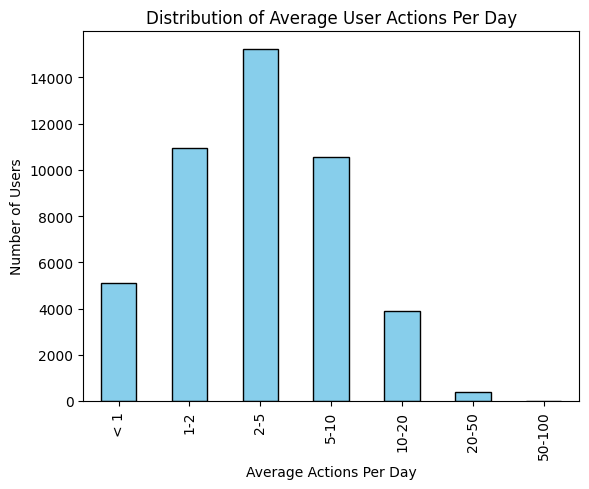

In [20]:
bins = [0, 1, 2, 5, 10, 20, 50, 100]
labels = ['< 1', '1-2', '2-5', '5-10', '10-20', '20-50', '50-100']
data_binned = pd.cut(usd_arrg['event_count_per_day'], bins=bins, labels=labels, right=False)

# Считаем количество значений в каждом бине
bin_counts = data_binned.value_counts().sort_index()

# Построение графика
bin_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Average User Actions Per Day')
plt.xlabel('Average Actions Per Day')
plt.ylabel('Number of Users')
plt.show()

# Прогнозируем

1. Задачу можно решать влоб регрессией, а можно отдельно предсказывать срок жизни и потенциальный LTV в случае когда клиент остается с нами, а потом "перемножать" эти метрики.
2. С первого захода получается что линейная регрессия точнее деревьев. Объясняется это тем, что LTV за 120 дней сильно корреклирует с LTV за n-дней, причем линейно
3. Надо добавить фичи, связанные со страной (можно применить target encoding)
4. Можно отдельно предсказывать заработок от рекламы и отдельно от покупок
5. Попробовать насчитать временные меры не только от времени жизни клиента, но и от максимального среза данных
6. RFM фичи
7. 

In [21]:
# Насчитаем мин даты для каждого пользователя и сместим к нулю, так как есть пользователи
# по которым транзакции начинаются не с первого дня. Я предполагаю что это просто ошибка расчета первой даты
# по этому привожу все транзакции к нулю (первой транзакции в датасете)
data_df['min_eventSar'] = data_df.groupby('id')['eventSar'].transform('min')
data_df['eventSar'] = data_df['eventSar'] - data_df['min_eventSar']

In [22]:
threshold_days = 30

In [23]:
data_df

,id,cc,eventId,eventSar,eventValue,login_count,payment_revenue,levelup,tutorial_complete,ad_revenue,time_first_payment,min_eventSar
0,ac47db89-e5ff-41a2-a685-1b54964dac80,KR,5,7752583,0.020080,0,0.0,0.0,0,0.020080,0,2
1,b39b3141-2885-4430-9ede-12f44db1f752,US,5,7729924,0.006350,0,0.0,0.0,0,0.006350,0,1
2,b39b3141-2885-4430-9ede-12f44db1f752,US,5,7729924,0.001370,0,0.0,0.0,0,0.001370,0,1
3,b39b3141-2885-4430-9ede-12f44db1f752,US,5,7729924,0.023167,0,0.0,0.0,0,0.023167,0,1
4,b39b3141-2885-4430-9ede-12f44db1f752,US,5,7816324,0.119760,0,0.0,0.0,0,0.119760,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1463801,e5ad9d7a-8005-43c6-8b16-1caf02741ce3,US,1,3206940,0.000000,1,0.0,0.0,0,0.000000,0,0
1463802,b473b944-6b91-4be4-9e9d-df9a653a690a,US,1,3376186,0.000000,1,0.0,0.0,0,0.000000,0,1
1463803,408ca224-efd5-4438-a620-12796df59e20,US,1,360365,0.000000,1,0.0,0.0,0,0.000000,0,6
1463804,2bb2a779-15be-4b8d-bdc5-a0a85b5b5d3e,US,1,878489,0.000000,1,0.0,0.0,0,0.000000,0,1


In [24]:
def make_features_threshold(
    df: pd.DataFrame, 
    threshold_days: int,
) -> pd.DataFrame:
    """
    Function which cuts input data using threshold_days and calculates all features
    """
    
    # Calculate event day
    df['eventSar_days'] = df['eventSar'] / (60*60*24)
    df['eventSar_days'] = np.ceil(df['eventSar_days'])
    
    df_cut = df[df['eventSar_days'] <= threshold_days]
    
    usr_arrg = df_cut.groupby('id').agg(
        event_count=('eventSar', 'count'),
        
        cc=('cc', 'max'),

        max_action_time=('eventSar', 'max'),
        time_first_payment = ('time_first_payment', 'max'),
        max_lvl=('levelup', 'max'),
        tutorial_complete=('tutorial_complete', 'max'),

        ad_revenue=('ad_revenue', 'sum'),
        payment_revenue=('payment_revenue', 'sum'),
        login_count=('login_count', 'sum'),
    ).reset_index()

    usr_arrg['LTV'] = usr_arrg['ad_revenue'] + usr_arrg['payment_revenue']

    # Ставим минимальное время жизни равное одному часу чтобы потом нормально посчитать дневные метрики
    usr_arrg['max_action_time'] = np.where(usr_arrg['max_action_time']==0, 60*60, usr_arrg['max_action_time'])
    usr_arrg['lifespan_days'] = usr_arrg['max_action_time'] / (60*60*24)
    usr_arrg['lifespan_days'] = np.ceil(usr_arrg['lifespan_days'])
    
    # Features based on the user lifespan
    usr_arrg['levelup_speed'] = usr_arrg['max_lvl'] / usr_arrg['lifespan_days']
    usr_arrg['login_per_day'] = usr_arrg['login_count'] / usr_arrg['lifespan_days']
    usr_arrg['ad_revenue_per_day'] = usr_arrg['ad_revenue'] / usr_arrg['lifespan_days']
    usr_arrg['payment_revenue_per_day'] = usr_arrg['payment_revenue'] / usr_arrg['lifespan_days']
    usr_arrg['LTV_per_day'] = usr_arrg['LTV'] / usr_arrg['lifespan_days']
    usr_arrg['event_count_per_day'] = usr_arrg['event_count'] / usr_arrg['lifespan_days']
    
    # Features based on the MAX potential user lifespan
    usr_arrg['levelup_speed_potential'] = usr_arrg['max_lvl'] / threshold_days
    usr_arrg['login_per_day_potential'] = usr_arrg['login_count'] / threshold_days
    usr_arrg['ad_revenue_per_day_potential'] = usr_arrg['ad_revenue'] / threshold_days
    usr_arrg['payment_revenue_per_day_potential'] = usr_arrg['payment_revenue'] / threshold_days
    usr_arrg['LTV_per_day_potential'] = usr_arrg['LTV'] / threshold_days
    usr_arrg['event_count_per_day_potential'] = usr_arrg['event_count'] / threshold_days
    return usr_arrg

In [25]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, cross_val_score, StratifiedKFold
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

from catboost import CatBoostRegressor

In [26]:
y_col = 'LTV'
f_columns = [
    'event_count', 'max_action_time', 'max_lvl',
    'tutorial_complete', 'ad_revenue', 'payment_revenue', 'login_count',
    'LTV_cut', 'lifespan_days', 'levelup_speed', 'login_per_day',
    'ad_revenue_per_day', 'payment_revenue_per_day', 'LTV_per_day',
    'event_count_per_day', 
    'levelup_speed_potential', 'login_per_day_potential', 'ad_revenue_per_day_potential',
    'payment_revenue_per_day_potential', 'LTV_per_day_potential', 'event_count_per_day_potential',
    'time_first_payment',
]

### Подготавливаем модель L1 регрессии

In [27]:
def fit_l1(X, y):
    # Define the model
    model = Lasso(alpha=0.1, random_state=42, max_iter=5000)

    # Define 5-fold cross-validation
    kf = KFold(n_splits=5, shuffle=True, random_state=42)

    # List to store MSE for each fold
    mse_scores = []
    
    
    # Инициализируем StandardScaler для стандартизации фичей
    scaler = StandardScaler()

    # Iterate through each fold
    iter_res = {
        'y_pred_sum': [],
        'y_test_sum': [],
    }
    for fold, (train_index, test_index) in enumerate(kf.split(X), 1):
        print(f"Training fold {fold}...")

        # Split data
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        # Применяем стандартизацию к тренировочным данным
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
    
        # Train the model
        model.fit(X_train_scaled, y_train)

        # Make predictions
        y_pred = model.predict(X_test_scaled)
        
        iter_res['y_pred_sum'].append(sum(y_pred))
        iter_res['y_test_sum'].append(sum(y_test))

        # Calculate the MSE for the current fold
        mse = mean_squared_error(y_test, y_pred)
        mse_scores.append(mse)
        
        bias_abs = sum(y_pred) - sum(y_test)
        bias_rel = sum(y_pred) / sum(y_test)

        print(f"Fold {fold} MSE: {mse:.4f} BIAS_ABS: {bias_abs:.0f} BIAS_REL: {bias_rel:.2f}")

    # Calculate the mean and standard deviation of the MSE across all folds
    mean_mse = np.mean(mse_scores)
    std_mse = np.std(mse_scores)

    print(f"\nMean MSE: {mean_mse:.4f}, Std MSE: {std_mse:.4f}")
    res_dict = {
        'mean_mse': mean_mse, 
        'std_mse': std_mse, 
        'model': model,
        'bias_abs': bias_abs,
        'bias_rel': bias_rel,
        'y_pred': sum(iter_res['y_pred_sum']),
        'y_test': sum(iter_res['y_test_sum']),
    }
    return res_dict

Я считал фичи относительно времени жизни юзера, а можно посчитать относительно максимально возможного времени жизни (120 деней в нашем случае)

In [28]:
# Подготовим агрегат по пользователям на полных данных (правильные ответы) и возьмем LTV
data_true = make_features_threshold(data_df, 120)[['id', 'LTV']]

## Прогоняем линейную регрессию на разных срезах данных чтобы найти оптимальный самый ранний срез

In [29]:
res = []
for threshold_days in range(5, 125, 5):
    print(f'Testing threshold: {threshold_days}')
    data_cut = make_features_threshold(data_df, threshold_days)
    data_cut = data_cut.rename(columns={'LTV': 'LTV_cut'})
    data_cut = data_cut.merge(data_true[['id', 'LTV']], how='left', on='id')
    
    X = data_cut[f_columns]
    y = data_cut[y_col]
    res_dict = fit_l1(X, y)
    res.append({**{'threshold_days': threshold_days}, **res_dict})

Testing threshold: 5
Training fold 1...
Fold 1 MSE: 114.8410 BIAS_ABS: 3851 BIAS_REL: 1.52
Training fold 2...
Fold 2 MSE: 303.8826 BIAS_ABS: -1173 BIAS_REL: 0.91
Training fold 3...
Fold 3 MSE: 165.4624 BIAS_ABS: 667 BIAS_REL: 1.06
Training fold 4...
Fold 4 MSE: 739.4598 BIAS_ABS: -3075 BIAS_REL: 0.76
Training fold 5...
Fold 5 MSE: 567.5710 BIAS_ABS: -207 BIAS_REL: 0.98

Mean MSE: 378.2434, Std MSE: 239.3777
Testing threshold: 10
Training fold 1...
Fold 1 MSE: 80.2626 BIAS_ABS: 2895 BIAS_REL: 1.39
Training fold 2...
Fold 2 MSE: 256.0163 BIAS_ABS: -1893 BIAS_REL: 0.85
Training fold 3...
Fold 3 MSE: 136.5820 BIAS_ABS: 1705 BIAS_REL: 1.16
Training fold 4...
Fold 4 MSE: 642.4011 BIAS_ABS: -2984 BIAS_REL: 0.77
Training fold 5...
Fold 5 MSE: 282.2771 BIAS_ABS: 91 BIAS_REL: 1.01

Mean MSE: 279.5078, Std MSE: 196.1517
Testing threshold: 15
Training fold 1...
Fold 1 MSE: 46.2432 BIAS_ABS: 2395 BIAS_REL: 1.32
Training fold 2...
Fold 2 MSE: 183.7078 BIAS_ABS: -1443 BIAS_REL: 0.89
Training fold 3..

In [30]:
# Взглянем на важность признаков для одной модели
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': res[0]['model'].coef_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importances:")
print(feature_importance_df)


Feature Importances:
                              Feature  Importance
7                             LTV_cut   11.828619
4                          ad_revenue    2.775137
19              LTV_per_day_potential    1.722620
21                 time_first_payment    0.907135
1                     max_action_time    0.000000
20      event_count_per_day_potential   -0.000000
18  payment_revenue_per_day_potential    0.000000
17       ad_revenue_per_day_potential    0.000000
15            levelup_speed_potential   -0.000000
12            payment_revenue_per_day   -0.000000
0                         event_count   -0.000000
9                       levelup_speed   -0.000000
8                       lifespan_days    0.000000
6                         login_count   -0.000000
5                     payment_revenue    0.000000
3                   tutorial_complete    0.000000
2                             max_lvl   -0.000000
16            login_per_day_potential   -0.014599
10                      logi

In [31]:
res_lr_df = pd.DataFrame(res)
res_lr_df

,threshold_days,mean_mse,std_mse,model,bias_abs,bias_rel,y_pred,y_test
0,5,378.243357,239.377668,"Lasso(alpha=0.1, max_iter=5000, random_state=42)",-206.576718,0.983602,56444.181763,56380.909901
1,10,279.507837,196.151734,"Lasso(alpha=0.1, max_iter=5000, random_state=42)",91.362788,1.007252,56195.034755,56380.909901
2,15,219.997448,197.389480,"Lasso(alpha=0.1, max_iter=5000, random_state=42)",718.518330,1.057035,56214.732709,56380.909901
3,20,183.414602,200.842317,"Lasso(alpha=0.1, max_iter=5000, random_state=42)",1271.571995,1.100936,56346.145457,56380.909901
4,25,169.785166,207.113490,"Lasso(alpha=0.1, max_iter=5000, random_state=42)",1521.312305,1.120760,56346.728966,56380.909901
5,30,150.742300,189.851595,"Lasso(alpha=0.1, max_iter=5000, random_state=42)",1780.754497,1.141354,56415.846254,56380.909901
6,35,138.923843,182.770359,"Lasso(alpha=0.1, max_iter=5000, random_state=42)",1762.219375,1.139883,56420.043881,56380.909901
7,40,128.253838,174.255996,"Lasso(alpha=0.1, max_iter=5000, random_state=42)",1420.719216,1.112775,56411.703499,56380.909901
8,45,107.557715,148.188882,"Lasso(alpha=0.1, max_iter=5000, random_state=42)",1184.058778,1.093989,56433.618615,56380.909901
9,50,103.577725,146.299731,"Lasso(alpha=0.1, max_iter=5000, random_state=42)",1271.063719,1.100895,56434.834526,56380.909901


### Судя по графику ниже мы получаем неплохую точность при прогнозе за первые 20 дней

<Axes: xlabel='threshold_days'>

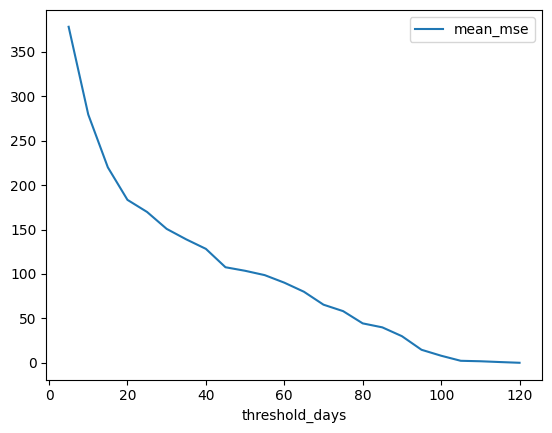

In [32]:
res_lr_df.plot(x='threshold_days', y='mean_mse')

### Подготавливаем модель RF
Метрики хуже чем у линейной регрессии

In [33]:
def fit_rf(X, y):
    # Define the model
    rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

    # Define 5-fold cross-validation
    kf = KFold(n_splits=5, shuffle=True, random_state=42)

    # List to store MSE for each fold
    mse_scores = []

    # Iterate through each fold
    for fold, (train_index, test_index) in enumerate(kf.split(X), 1):
        print(f"Training fold {fold}...")

        # Split data
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Train the model
        rf.fit(X_train, y_train)

        # Make predictions
        y_pred = rf.predict(X_test)

        # Calculate the MSE for the current fold
        mse = mean_squared_error(y_test, y_pred)
        mse_scores.append(mse)

        print(f"Fold {fold} MSE: {mse:.4f}")

    # Calculate the mean and standard deviation of the MSE across all folds
    mean_mse = np.mean(mse_scores)
    std_mse = np.std(mse_scores)

    print(f"\nMean MSE: {mean_mse:.4f}, Std MSE: {std_mse:.4f}")
    return {'mean_mse': mean_mse, 'std_mse': std_mse}

In [34]:
res = []
for threshold_days in [20]:
    print(f'Testing threshold: {threshold_days}')
    data_cut = make_features_threshold(data_df, threshold_days)
    data_cut = data_cut.rename(columns={'LTV': 'LTV_cut'})
    data_cut = data_cut.merge(data_true[['id', 'LTV']], how='left', on='id')
    
    X = data_cut[f_columns]
    y = data_cut[y_col]
    res_dict = fit_rf(X, y)
    res.append({**{'threshold_days': threshold_days}, **res_dict})

Testing threshold: 20
Training fold 1...
Fold 1 MSE: 60.3700
Training fold 2...
Fold 2 MSE: 238.8390
Training fold 3...
Fold 3 MSE: 131.3029
Training fold 4...
Fold 4 MSE: 563.6078
Training fold 5...
Fold 5 MSE: 431.5547

Mean MSE: 285.1349, Std MSE: 187.2500


In [35]:
res_df = pd.DataFrame(res)
res_df

,threshold_days,mean_mse,std_mse
0,20,285.134907,187.249977


### Подготавливам catboost
Метрики хуже

In [36]:
def fit_cb(X, y):
    # Define the model with early stopping
    model = CatBoostRegressor(
        iterations=1000, 
        learning_rate=0.1,
        depth=6, 
        random_state=42, 
        verbose=0, 
        early_stopping_rounds=50,
    )

    # Define 5-fold cross-validation
    kf = KFold(n_splits=5, shuffle=True, random_state=42)

    # List to store MSE for each fold
    mse_scores = []

    # Iterate through each fold
    for fold, (train_index, test_index) in enumerate(kf.split(X), 1):
        print(f"Training fold {fold}...")

        # Split data
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Further split the training data for early stopping
        train_index_split = int(0.8 * len(X_train))  # 80% для обучения, 20% для валидации
        X_train_split, X_val_split = X_train.iloc[:train_index_split], X_train.iloc[train_index_split:]
        y_train_split, y_val_split = y_train.iloc[:train_index_split], y_train.iloc[train_index_split:]

        # Train the model with early stopping
        model.fit(X_train_split, y_train_split, 
                  eval_set=(X_val_split, y_val_split), 
                  use_best_model=True)

        # Make predictions
        y_pred = model.predict(X_test)

        # Calculate the MSE for the current fold
        mse = mean_squared_error(y_test, y_pred)
        mse_scores.append(mse)

        print(f"Fold {fold} MSE: {mse:.4f}")

    # Calculate the mean and standard deviation of the MSE across all folds
    mean_mse = np.mean(mse_scores)
    std_mse = np.std(mse_scores)

    print(f"\nMean MSE: {mean_mse:.4f}, Std MSE: {std_mse:.4f}")
    return {'mean_mse': mean_mse, 'std_mse': std_mse}

In [37]:
res = []
for threshold_days in [20]:
    print(f'Testing threshold: {threshold_days}')
    data_cut = make_features_threshold(data_df, threshold_days)
    data_cut = data_cut.rename(columns={'LTV': 'LTV_cut'})
    data_cut = data_cut.merge(data_true[['id', 'LTV']], how='left', on='id')
    
    X = data_cut[f_columns]
    y = data_cut[y_col]
    res_dict = fit_cb(X, y)
    res.append({**{'threshold_days': threshold_days}, **res_dict})

Testing threshold: 20
Training fold 1...
Fold 1 MSE: 37.4174
Training fold 2...
Fold 2 MSE: 155.3058
Training fold 3...
Fold 3 MSE: 123.8991
Training fold 4...
Fold 4 MSE: 591.9221
Training fold 5...
Fold 5 MSE: 623.7554

Mean MSE: 306.4599, Std MSE: 249.2890


### Получаем что линейные модели перформят лучше. Будем дальше развивать эту мысль

In [38]:
res = []
for threshold_days in [20]:
    print(f'Testing threshold: {threshold_days}')
    data_cut = make_features_threshold(data_df, threshold_days)
    data_cut = data_cut.rename(columns={'LTV': 'LTV_cut'})
    data_cut = data_cut.merge(data_true[['id', 'LTV']], how='left', on='id')
    
    X = data_cut[f_columns]
    y = data_cut[y_col]
    res_dict = fit_l1(X, y)
    res.append({**{'threshold_days': threshold_days}, **res_dict})

Testing threshold: 20
Training fold 1...
Fold 1 MSE: 28.1118 BIAS_ABS: 1911 BIAS_REL: 1.26
Training fold 2...
Fold 2 MSE: 145.9594 BIAS_ABS: -1100 BIAS_REL: 0.91
Training fold 3...
Fold 3 MSE: 96.8714 BIAS_ABS: 1055 BIAS_REL: 1.10
Training fold 4...
Fold 4 MSE: 577.6944 BIAS_ABS: -3172 BIAS_REL: 0.75
Training fold 5...
Fold 5 MSE: 68.4360 BIAS_ABS: 1272 BIAS_REL: 1.10

Mean MSE: 183.4146, Std MSE: 200.8423


In [39]:
res

[{'threshold_days': 20,
  'mean_mse': 183.41460188275434,
  'std_mse': 200.84231680295767,
  'model': Lasso(alpha=0.1, max_iter=5000, random_state=42),
  'bias_abs': 1271.5719945945766,
  'bias_rel': 1.100935713259482,
  'y_pred': 56346.14545655396,
  'y_test': 56380.90990100002}]

## Делаем более гибкий функционал и добавляем стратификацию чтобы при CV в фолды равномернее попадали высокие значения

In [40]:
def apply_target_encoding(X_train, X_test, y_train, categorical_columns):
    """
    Applies target encoding to multiple categorical columns.
    The target encoding is based on the mean target value for each unique category in the training set.
    """
    X_train = X_train.copy()  # Избегаем проблем с изменением оригинальных данных
    X_test = X_test.copy()    # Тоже копируем тестовые данные
    
    for cat_column in categorical_columns:
        # Compute the mean target for each category in the training set
        target_mean = y_train.groupby(X_train[cat_column]).mean()

        # Map the training set categories to their mean target value
        X_train.loc[:, cat_column] = X_train[cat_column].map(target_mean)

        # Map the test set categories to the same mean target value (using training data mapping)
        X_test.loc[:, cat_column] = X_test[cat_column].map(target_mean)

        # Handle unknown categories in the test set (i.e., categories not seen in training)
        X_test.loc[:, cat_column] = X_test[cat_column].fillna(target_mean.mean())
        
        # Явно приводим к корректным типам данных, если это нужно, чтобы избежать предупреждения
        X_test[cat_column] = X_test[cat_column].infer_objects()

    return X_train, X_test


def fit_model(
    X, 
    y, 
    model=None, 
    scaler=None, 
    cv_strategy=None, 
    n_splits=5, 
    random_state=42, 
    stratify=None, 
    categorical_columns=None,
    **model_kwargs
):
    # Define default model if not provided
    if model is None:
        model = Lasso(alpha=0.1, random_state=random_state, max_iter=5000, **model_kwargs)


    # Define cross-validation strategy
    if cv_strategy is None:
        if stratify is None:
            cv_strategy = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)
        else:
            cv_strategy = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_state)
     
            
    # Default scaler is StandardScaler unless None is provided
    if scaler is None:
        scaler = StandardScaler()

    # List to store MSE for each fold
    mse_scores = []
    
    iter_res = {
        'y_pred_sum': [],
        'y_test_sum': [],
    }

    # Iterate through each fold
    for fold, (train_index, test_index) in enumerate(cv_strategy.split(X, stratify), 1):
        print(f"Training fold {fold}...")

        # Split data
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        # Apply target encoding for all categorical columns if provided
        if categorical_columns is not None:
            X_train, X_test = apply_target_encoding(X_train, X_test, y_train, categorical_columns)
        
        # Apply scaling if scaler is provided
        if scaler:
            X_train_scaled = scaler.fit_transform(X_train)
            X_test_scaled = scaler.transform(X_test)
        else:
            X_train_scaled, X_test_scaled = X_train, X_test

        # Train the model
        model.fit(X_train_scaled, y_train)

        # Make predictions
        y_pred = model.predict(X_test_scaled)

        iter_res['y_pred_sum'].append(sum(y_pred))
        iter_res['y_test_sum'].append(sum(y_test))

        # Calculate the MSE for the current fold
        mse = mean_squared_error(y_test, y_pred)
        mse_scores.append(mse)

        bias_abs = sum(y_pred) - sum(y_test)
        bias_rel = sum(y_pred) / sum(y_test)

        print(f"Fold {fold} MSE: {mse:.4f} BIAS_ABS: {bias_abs:.0f} BIAS_REL: {bias_rel:.2f}")

    # Calculate the mean and standard deviation of the MSE across all folds
    mean_mse = np.mean(mse_scores)
    std_mse = np.std(mse_scores)

    print(f"\nMean MSE: {mean_mse:.4f}, Std MSE: {std_mse:.4f}")
    res_dict = {
        'mean_mse': mean_mse,
        'std_mse': std_mse,
        'model': model,
        'bias_abs': bias_abs,
        'bias_rel': bias_rel,
        'y_pred': sum(iter_res['y_pred_sum']),
        'y_test': sum(iter_res['y_test_sum']),
    }
    return res_dict



In [41]:
res = []
for threshold_days in [20]:
    print(f'Testing threshold: {threshold_days}')
    data_cut = make_features_threshold(data_df, threshold_days)
    data_cut = data_cut.rename(columns={'LTV': 'LTV_cut'})
    data_cut = data_cut.merge(data_true[['id', 'LTV']], how='left', on='id')
    
    X = data_cut[f_columns]
    y = data_cut[y_col]
    model = Lasso(alpha=0.10, random_state=42, max_iter=5000,)
    
    # Define the conditions and the corresponding choices
    conditions = [
        (y == 0),          # Zero values
        (y > 0) & (y <= 400),  # Values greater than 0 but less than or equal to 400
        (y > 400)          # Values greater than 400
    ]
    choices = [0, 1, 2]
    # Apply np.select to categorize the values
    y_binned = np.select(conditions, choices)
    
    res_dict = fit_model(X, y, model=model, stratify=y_binned)
    res.append({**{'threshold_days': threshold_days}, **res_dict})

Testing threshold: 20
Training fold 1...
Fold 1 MSE: 418.0495 BIAS_ABS: 736 BIAS_REL: 1.06
Training fold 2...
Fold 2 MSE: 49.2324 BIAS_ABS: 1843 BIAS_REL: 1.20
Training fold 3...
Fold 3 MSE: 110.9540 BIAS_ABS: -1081 BIAS_REL: 0.91
Training fold 4...
Fold 4 MSE: 123.1334 BIAS_ABS: 253 BIAS_REL: 1.02
Training fold 5...
Fold 5 MSE: 227.3819 BIAS_ABS: -1855 BIAS_REL: 0.85

Mean MSE: 185.7502, Std MSE: 129.4979


In [42]:
# Взглянем на важность признаков для одной модели
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': res[0]['model'].coef_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importances:")
print(feature_importance_df)


Feature Importances:
                              Feature  Importance
7                             LTV_cut   16.006407
5                     payment_revenue    5.145550
19              LTV_per_day_potential    1.263965
4                          ad_revenue    1.158493
6                         login_count    0.168646
0                         event_count    0.000000
14                event_count_per_day    0.000000
20      event_count_per_day_potential    0.000000
18  payment_revenue_per_day_potential    0.000000
17       ad_revenue_per_day_potential    0.000000
16            login_per_day_potential    0.000000
15            levelup_speed_potential   -0.000000
21                 time_first_payment    0.000000
12            payment_revenue_per_day   -0.000000
1                     max_action_time    0.000000
10                      login_per_day    0.000000
9                       levelup_speed    0.000000
8                       lifespan_days    0.000000
3                   tutorial

In [43]:
res

[{'threshold_days': 20,
  'mean_mse': 185.75022351071343,
  'std_mse': 129.49793851869902,
  'model': Lasso(alpha=0.1, max_iter=5000, random_state=42),
  'bias_abs': -1855.0680803194955,
  'bias_rel': 0.8480792710200934,
  'y_pred': 56276.68743606241,
  'y_test': 56380.909901000006}]

### Тестируем на 10 randomstates
Общая метрика получается стабильной, хоть и на разных фолдах она и волатильная

In [44]:
# Test the model on multiple random states
random_states = list(range(10))  # Define a list of random states
res = []
y_col = 'LTV'
f_columns = [
    'event_count', 'max_action_time', 'max_lvl',
    'tutorial_complete', 'ad_revenue', 'payment_revenue', 'login_count',
    'LTV_cut', 'lifespan_days', 'levelup_speed', 'login_per_day',
    'ad_revenue_per_day', 'payment_revenue_per_day', 'LTV_per_day',
    'event_count_per_day', 
    'levelup_speed_potential', 'login_per_day_potential', 'ad_revenue_per_day_potential',
    'payment_revenue_per_day_potential', 'LTV_per_day_potential', 'event_count_per_day_potential',
    'time_first_payment',
    'cc',
]
categorical_columns = ['cc']

for random_state in random_states:
    for threshold_days in [20]:  # You can add more thresholds if needed
        print(f'Testing threshold: {threshold_days} with random_state: {random_state}')
        data_cut = make_features_threshold(data_df, threshold_days)
        data_cut = data_cut.rename(columns={'LTV': 'LTV_cut'})
        data_cut = data_cut.merge(data_true[['id', 'LTV']], how='left', on='id')
        
        X = data_cut[f_columns]
        y = data_cut[y_col]
        model = Lasso(alpha=0.1, random_state=random_state, max_iter=5000,)
        
        # Define the conditions and the corresponding choices
        conditions = [
            (y == 0),          # Zero values
            (y > 0) & (y <= 400),  # Values greater than 0 but less than or equal to 400
            (y > 400)          # Values greater than 400
        ]
        choices = [0, 1, 2]
        # Apply np.select to categorize the values
        y_binned = np.select(conditions, choices)
        
        # Fit the model and store results
        res_dict = fit_model(
            X, 
            y, 
            model=model, 
            stratify=y_binned, 
            random_state=random_state, 
            categorical_columns=categorical_columns,
        )
        res.append({**{'random_state': random_state, 'threshold_days': threshold_days}, **res_dict})


Testing threshold: 20 with random_state: 0
Training fold 1...


/tmp/ipykernel_17/158899817.py:20: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_test.loc[:, cat_column] = X_test[cat_column].fillna(target_mean.mean())


Fold 1 MSE: 397.4478 BIAS_ABS: -219 BIAS_REL: 0.98
Training fold 2...


/tmp/ipykernel_17/158899817.py:20: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_test.loc[:, cat_column] = X_test[cat_column].fillna(target_mean.mean())


Fold 2 MSE: 88.4514 BIAS_ABS: 1136 BIAS_REL: 1.11
Training fold 3...


/tmp/ipykernel_17/158899817.py:20: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_test.loc[:, cat_column] = X_test[cat_column].fillna(target_mean.mean())


Fold 3 MSE: 221.5123 BIAS_ABS: -818 BIAS_REL: 0.94
Training fold 4...


/tmp/ipykernel_17/158899817.py:20: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_test.loc[:, cat_column] = X_test[cat_column].fillna(target_mean.mean())


Fold 4 MSE: 154.9510 BIAS_ABS: -1445 BIAS_REL: 0.88
Training fold 5...


/tmp/ipykernel_17/158899817.py:20: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_test.loc[:, cat_column] = X_test[cat_column].fillna(target_mean.mean())


Fold 5 MSE: 58.6860 BIAS_ABS: 1307 BIAS_REL: 1.13

Mean MSE: 184.2097, Std MSE: 120.5354
Testing threshold: 20 with random_state: 1
Training fold 1...


/tmp/ipykernel_17/158899817.py:20: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_test.loc[:, cat_column] = X_test[cat_column].fillna(target_mean.mean())


Fold 1 MSE: 122.9442 BIAS_ABS: 579 BIAS_REL: 1.06
Training fold 2...


/tmp/ipykernel_17/158899817.py:20: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_test.loc[:, cat_column] = X_test[cat_column].fillna(target_mean.mean())


Fold 2 MSE: 496.8373 BIAS_ABS: -2489 BIAS_REL: 0.81
Training fold 3...


/tmp/ipykernel_17/158899817.py:20: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_test.loc[:, cat_column] = X_test[cat_column].fillna(target_mean.mean())


Fold 3 MSE: 48.6106 BIAS_ABS: 1690 BIAS_REL: 1.13
Training fold 4...


/tmp/ipykernel_17/158899817.py:20: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_test.loc[:, cat_column] = X_test[cat_column].fillna(target_mean.mean())


Fold 4 MSE: 85.3883 BIAS_ABS: 1019 BIAS_REL: 1.09
Training fold 5...


/tmp/ipykernel_17/158899817.py:20: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_test.loc[:, cat_column] = X_test[cat_column].fillna(target_mean.mean())


Fold 5 MSE: 167.2393 BIAS_ABS: -820 BIAS_REL: 0.92

Mean MSE: 184.2039, Std MSE: 161.2019
Testing threshold: 20 with random_state: 2
Training fold 1...


/tmp/ipykernel_17/158899817.py:20: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_test.loc[:, cat_column] = X_test[cat_column].fillna(target_mean.mean())


Fold 1 MSE: 28.4001 BIAS_ABS: 2278 BIAS_REL: 1.21
Training fold 2...


/tmp/ipykernel_17/158899817.py:20: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_test.loc[:, cat_column] = X_test[cat_column].fillna(target_mean.mean())


Fold 2 MSE: 130.8862 BIAS_ABS: 495 BIAS_REL: 1.05
Training fold 3...


/tmp/ipykernel_17/158899817.py:20: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_test.loc[:, cat_column] = X_test[cat_column].fillna(target_mean.mean())


Fold 3 MSE: 78.8527 BIAS_ABS: -115 BIAS_REL: 0.99
Training fold 4...


/tmp/ipykernel_17/158899817.py:20: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_test.loc[:, cat_column] = X_test[cat_column].fillna(target_mean.mean())


Fold 4 MSE: 209.0931 BIAS_ABS: -1239 BIAS_REL: 0.89
Training fold 5...


/tmp/ipykernel_17/158899817.py:20: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_test.loc[:, cat_column] = X_test[cat_column].fillna(target_mean.mean())


Fold 5 MSE: 470.6599 BIAS_ABS: -1497 BIAS_REL: 0.88

Mean MSE: 183.5784, Std MSE: 155.4934
Testing threshold: 20 with random_state: 3
Training fold 1...


/tmp/ipykernel_17/158899817.py:20: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_test.loc[:, cat_column] = X_test[cat_column].fillna(target_mean.mean())


Fold 1 MSE: 105.7841 BIAS_ABS: 962 BIAS_REL: 1.08
Training fold 2...


/tmp/ipykernel_17/158899817.py:20: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_test.loc[:, cat_column] = X_test[cat_column].fillna(target_mean.mean())


Fold 2 MSE: 88.5754 BIAS_ABS: 906 BIAS_REL: 1.07
Training fold 3...


/tmp/ipykernel_17/158899817.py:20: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_test.loc[:, cat_column] = X_test[cat_column].fillna(target_mean.mean())


Fold 3 MSE: 425.4358 BIAS_ABS: -1378 BIAS_REL: 0.86
Training fold 4...


/tmp/ipykernel_17/158899817.py:20: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_test.loc[:, cat_column] = X_test[cat_column].fillna(target_mean.mean())


Fold 4 MSE: 208.4962 BIAS_ABS: -303 BIAS_REL: 0.97
Training fold 5...


/tmp/ipykernel_17/158899817.py:20: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_test.loc[:, cat_column] = X_test[cat_column].fillna(target_mean.mean())


Fold 5 MSE: 88.1563 BIAS_ABS: -169 BIAS_REL: 0.98

Mean MSE: 183.2896, Std MSE: 129.0723
Testing threshold: 20 with random_state: 4
Training fold 1...


/tmp/ipykernel_17/158899817.py:20: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_test.loc[:, cat_column] = X_test[cat_column].fillna(target_mean.mean())


Fold 1 MSE: 119.6977 BIAS_ABS: 776 BIAS_REL: 1.08
Training fold 2...


/tmp/ipykernel_17/158899817.py:20: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_test.loc[:, cat_column] = X_test[cat_column].fillna(target_mean.mean())


Fold 2 MSE: 70.4083 BIAS_ABS: 1214 BIAS_REL: 1.10
Training fold 3...


/tmp/ipykernel_17/158899817.py:20: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_test.loc[:, cat_column] = X_test[cat_column].fillna(target_mean.mean())


Fold 3 MSE: 62.5253 BIAS_ABS: 1829 BIAS_REL: 1.19
Training fold 4...


/tmp/ipykernel_17/158899817.py:20: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_test.loc[:, cat_column] = X_test[cat_column].fillna(target_mean.mean())


Fold 4 MSE: 509.3400 BIAS_ABS: -1808 BIAS_REL: 0.86
Training fold 5...


/tmp/ipykernel_17/158899817.py:20: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_test.loc[:, cat_column] = X_test[cat_column].fillna(target_mean.mean())


Fold 5 MSE: 160.4298 BIAS_ABS: -2126 BIAS_REL: 0.82

Mean MSE: 184.4802, Std MSE: 166.2495
Testing threshold: 20 with random_state: 5
Training fold 1...


/tmp/ipykernel_17/158899817.py:20: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_test.loc[:, cat_column] = X_test[cat_column].fillna(target_mean.mean())


Fold 1 MSE: 70.7779 BIAS_ABS: 229 BIAS_REL: 1.03
Training fold 2...


/tmp/ipykernel_17/158899817.py:20: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_test.loc[:, cat_column] = X_test[cat_column].fillna(target_mean.mean())


Fold 2 MSE: 123.1373 BIAS_ABS: 742 BIAS_REL: 1.06
Training fold 3...


/tmp/ipykernel_17/158899817.py:20: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_test.loc[:, cat_column] = X_test[cat_column].fillna(target_mean.mean())


Fold 3 MSE: 92.6881 BIAS_ABS: -274 BIAS_REL: 0.97
Training fold 4...


/tmp/ipykernel_17/158899817.py:20: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_test.loc[:, cat_column] = X_test[cat_column].fillna(target_mean.mean())


Fold 4 MSE: 425.5942 BIAS_ABS: 321 BIAS_REL: 1.03
Training fold 5...


/tmp/ipykernel_17/158899817.py:20: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_test.loc[:, cat_column] = X_test[cat_column].fillna(target_mean.mean())


Fold 5 MSE: 208.7130 BIAS_ABS: -968 BIAS_REL: 0.93

Mean MSE: 184.1821, Std MSE: 129.4911
Testing threshold: 20 with random_state: 6
Training fold 1...


/tmp/ipykernel_17/158899817.py:20: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_test.loc[:, cat_column] = X_test[cat_column].fillna(target_mean.mean())


Fold 1 MSE: 50.3308 BIAS_ABS: 1232 BIAS_REL: 1.10
Training fold 2...


/tmp/ipykernel_17/158899817.py:20: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_test.loc[:, cat_column] = X_test[cat_column].fillna(target_mean.mean())


Fold 2 MSE: 468.9302 BIAS_ABS: -1827 BIAS_REL: 0.87
Training fold 3...


/tmp/ipykernel_17/158899817.py:20: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_test.loc[:, cat_column] = X_test[cat_column].fillna(target_mean.mean())


Fold 3 MSE: 118.4367 BIAS_ABS: -758 BIAS_REL: 0.92
Training fold 4...


/tmp/ipykernel_17/158899817.py:20: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_test.loc[:, cat_column] = X_test[cat_column].fillna(target_mean.mean())


Fold 4 MSE: 157.1679 BIAS_ABS: 322 BIAS_REL: 1.03
Training fold 5...


/tmp/ipykernel_17/158899817.py:20: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_test.loc[:, cat_column] = X_test[cat_column].fillna(target_mean.mean())


Fold 5 MSE: 126.9573 BIAS_ABS: 930 BIAS_REL: 1.08

Mean MSE: 184.3646, Std MSE: 146.5090
Testing threshold: 20 with random_state: 7
Training fold 1...


/tmp/ipykernel_17/158899817.py:20: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_test.loc[:, cat_column] = X_test[cat_column].fillna(target_mean.mean())


Fold 1 MSE: 31.7039 BIAS_ABS: 2189 BIAS_REL: 1.25
Training fold 2...


/tmp/ipykernel_17/158899817.py:20: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_test.loc[:, cat_column] = X_test[cat_column].fillna(target_mean.mean())


Fold 2 MSE: 211.4558 BIAS_ABS: -1756 BIAS_REL: 0.85
Training fold 3...


/tmp/ipykernel_17/158899817.py:20: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_test.loc[:, cat_column] = X_test[cat_column].fillna(target_mean.mean())


Fold 3 MSE: 423.2163 BIAS_ABS: -806 BIAS_REL: 0.93
Training fold 4...


/tmp/ipykernel_17/158899817.py:20: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_test.loc[:, cat_column] = X_test[cat_column].fillna(target_mean.mean())


Fold 4 MSE: 99.1777 BIAS_ABS: -219 BIAS_REL: 0.98
Training fold 5...


/tmp/ipykernel_17/158899817.py:20: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_test.loc[:, cat_column] = X_test[cat_column].fillna(target_mean.mean())


Fold 5 MSE: 153.7279 BIAS_ABS: 396 BIAS_REL: 1.03

Mean MSE: 183.8563, Std MSE: 133.6290
Testing threshold: 20 with random_state: 8
Training fold 1...


/tmp/ipykernel_17/158899817.py:20: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_test.loc[:, cat_column] = X_test[cat_column].fillna(target_mean.mean())


Fold 1 MSE: 104.5692 BIAS_ABS: 1225 BIAS_REL: 1.12
Training fold 2...


/tmp/ipykernel_17/158899817.py:20: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_test.loc[:, cat_column] = X_test[cat_column].fillna(target_mean.mean())


Fold 2 MSE: 427.6536 BIAS_ABS: -1191 BIAS_REL: 0.90
Training fold 3...


/tmp/ipykernel_17/158899817.py:20: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_test.loc[:, cat_column] = X_test[cat_column].fillna(target_mean.mean())


Fold 3 MSE: 170.7652 BIAS_ABS: -171 BIAS_REL: 0.99
Training fold 4...


/tmp/ipykernel_17/158899817.py:20: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_test.loc[:, cat_column] = X_test[cat_column].fillna(target_mean.mean())


Fold 4 MSE: 98.2632 BIAS_ABS: -126 BIAS_REL: 0.99
Training fold 5...


/tmp/ipykernel_17/158899817.py:20: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_test.loc[:, cat_column] = X_test[cat_column].fillna(target_mean.mean())


Fold 5 MSE: 117.9959 BIAS_ABS: 43 BIAS_REL: 1.00

Mean MSE: 183.8494, Std MSE: 124.5461
Testing threshold: 20 with random_state: 9
Training fold 1...


/tmp/ipykernel_17/158899817.py:20: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_test.loc[:, cat_column] = X_test[cat_column].fillna(target_mean.mean())


Fold 1 MSE: 102.8377 BIAS_ABS: 666 BIAS_REL: 1.06
Training fold 2...


/tmp/ipykernel_17/158899817.py:20: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_test.loc[:, cat_column] = X_test[cat_column].fillna(target_mean.mean())


Fold 2 MSE: 134.9103 BIAS_ABS: -47 BIAS_REL: 1.00
Training fold 3...


/tmp/ipykernel_17/158899817.py:20: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_test.loc[:, cat_column] = X_test[cat_column].fillna(target_mean.mean())


Fold 3 MSE: 56.1024 BIAS_ABS: 509 BIAS_REL: 1.04
Training fold 4...


/tmp/ipykernel_17/158899817.py:20: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_test.loc[:, cat_column] = X_test[cat_column].fillna(target_mean.mean())


Fold 4 MSE: 116.6113 BIAS_ABS: 949 BIAS_REL: 1.08
Training fold 5...


/tmp/ipykernel_17/158899817.py:20: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_test.loc[:, cat_column] = X_test[cat_column].fillna(target_mean.mean())


Fold 5 MSE: 508.6299 BIAS_ABS: -2234 BIAS_REL: 0.80

Mean MSE: 183.8183, Std MSE: 164.4874


## Попробуем еще покрутить модельки
Особой разницы нет. RF хуже всего

In [45]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor

# Test the model on multiple random states
random_states = list(range(1))  # Define a list of random states
res = []
y_col = 'LTV'
f_columns = [
    'event_count', 'max_action_time', 'max_lvl',
    'tutorial_complete', 'ad_revenue', 'payment_revenue', 'login_count',
    'LTV_cut', 'lifespan_days', 'levelup_speed', 'login_per_day',
    'ad_revenue_per_day', 'payment_revenue_per_day', 'LTV_per_day',
    'event_count_per_day', 
    'levelup_speed_potential', 'login_per_day_potential', 'ad_revenue_per_day_potential',
    'payment_revenue_per_day_potential', 'LTV_per_day_potential', 'event_count_per_day_potential',
    'time_first_payment',
    'cc',
]
categorical_columns = ['cc']

# Add models to test
models = {
    'Lasso': Lasso(alpha=0.1, random_state=0, max_iter=5000),
    'Ridge': Ridge(alpha=1.0, random_state=0, max_iter=5000),
    'ElasticNet': ElasticNet(alpha=0.1, l1_ratio=0.7, random_state=0, max_iter=5000),
    'RandomForest': RandomForestRegressor(n_estimators=300, random_state=0)
}

for random_state in random_states:
    for threshold_days in [20]:  # You can add more thresholds if needed
        print(f'Testing threshold: {threshold_days} with random_state: {random_state}')
        data_cut = make_features_threshold(data_df, threshold_days)
        data_cut = data_cut.rename(columns={'LTV': 'LTV_cut'})
        data_cut = data_cut.merge(data_true[['id', 'LTV']], how='left', on='id')
        
        X = data_cut[f_columns]
        y = data_cut[y_col]
        
        # Define the conditions and the corresponding choices for binning the target variable
        conditions = [
            (y == 0),          # Zero values
            (y > 0) & (y <= 400),  # Values greater than 0 but less than or equal to 400
            (y > 400)          # Values greater than 400
        ]
        choices = [0, 1, 2]
        y_binned = np.select(conditions, choices)
        
        for model_name, model in models.items():
            print(f'Testing model: {model_name}')
            
            # Fit the model and store results
            res_dict = fit_model(
                X, 
                y, 
                model=model, 
                stratify=y_binned, 
                random_state=random_state, 
                categorical_columns=categorical_columns,
            )
            res.append({
                'random_state': random_state, 
                'threshold_days': threshold_days, 
                'model': model_name, 
                **res_dict
            })

# After the loop, you'll have results for Lasso, Ridge, ElasticNet, and RandomForestRegressor


Testing threshold: 20 with random_state: 0
Testing model: Lasso
Training fold 1...


/tmp/ipykernel_17/158899817.py:20: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_test.loc[:, cat_column] = X_test[cat_column].fillna(target_mean.mean())


Fold 1 MSE: 397.4478 BIAS_ABS: -219 BIAS_REL: 0.98
Training fold 2...


/tmp/ipykernel_17/158899817.py:20: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_test.loc[:, cat_column] = X_test[cat_column].fillna(target_mean.mean())


Fold 2 MSE: 88.4514 BIAS_ABS: 1136 BIAS_REL: 1.11
Training fold 3...


/tmp/ipykernel_17/158899817.py:20: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_test.loc[:, cat_column] = X_test[cat_column].fillna(target_mean.mean())


Fold 3 MSE: 221.5123 BIAS_ABS: -818 BIAS_REL: 0.94
Training fold 4...


/tmp/ipykernel_17/158899817.py:20: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_test.loc[:, cat_column] = X_test[cat_column].fillna(target_mean.mean())


Fold 4 MSE: 154.9510 BIAS_ABS: -1445 BIAS_REL: 0.88
Training fold 5...


/tmp/ipykernel_17/158899817.py:20: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_test.loc[:, cat_column] = X_test[cat_column].fillna(target_mean.mean())


Fold 5 MSE: 58.6860 BIAS_ABS: 1307 BIAS_REL: 1.13

Mean MSE: 184.2097, Std MSE: 120.5354
Testing model: Ridge
Training fold 1...


/tmp/ipykernel_17/158899817.py:20: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_test.loc[:, cat_column] = X_test[cat_column].fillna(target_mean.mean())


Fold 1 MSE: 397.5741 BIAS_ABS: -200 BIAS_REL: 0.98
Training fold 2...


/tmp/ipykernel_17/158899817.py:20: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_test.loc[:, cat_column] = X_test[cat_column].fillna(target_mean.mean())


Fold 2 MSE: 89.1385 BIAS_ABS: 1117 BIAS_REL: 1.11
Training fold 3...


/tmp/ipykernel_17/158899817.py:20: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_test.loc[:, cat_column] = X_test[cat_column].fillna(target_mean.mean())


Fold 3 MSE: 220.2455 BIAS_ABS: -869 BIAS_REL: 0.93
Training fold 4...


/tmp/ipykernel_17/158899817.py:20: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_test.loc[:, cat_column] = X_test[cat_column].fillna(target_mean.mean())


Fold 4 MSE: 155.7439 BIAS_ABS: -1495 BIAS_REL: 0.88
Training fold 5...


/tmp/ipykernel_17/158899817.py:20: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_test.loc[:, cat_column] = X_test[cat_column].fillna(target_mean.mean())


Fold 5 MSE: 59.7397 BIAS_ABS: 1323 BIAS_REL: 1.13

Mean MSE: 184.4883, Std MSE: 120.1367
Testing model: ElasticNet
Training fold 1...


/tmp/ipykernel_17/158899817.py:20: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_test.loc[:, cat_column] = X_test[cat_column].fillna(target_mean.mean())


Fold 1 MSE: 397.8683 BIAS_ABS: -216 BIAS_REL: 0.98
Training fold 2...


/tmp/ipykernel_17/158899817.py:20: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_test.loc[:, cat_column] = X_test[cat_column].fillna(target_mean.mean())


Fold 2 MSE: 87.8256 BIAS_ABS: 1142 BIAS_REL: 1.11
Training fold 3...


/tmp/ipykernel_17/158899817.py:20: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_test.loc[:, cat_column] = X_test[cat_column].fillna(target_mean.mean())


Fold 3 MSE: 221.6277 BIAS_ABS: -821 BIAS_REL: 0.93
Training fold 4...


/tmp/ipykernel_17/158899817.py:20: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_test.loc[:, cat_column] = X_test[cat_column].fillna(target_mean.mean())


Fold 4 MSE: 155.7243 BIAS_ABS: -1446 BIAS_REL: 0.88
Training fold 5...


/tmp/ipykernel_17/158899817.py:20: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_test.loc[:, cat_column] = X_test[cat_column].fillna(target_mean.mean())


Fold 5 MSE: 58.5894 BIAS_ABS: 1297 BIAS_REL: 1.13

Mean MSE: 184.3271, Std MSE: 120.7740
Testing model: RandomForest
Training fold 1...


/tmp/ipykernel_17/158899817.py:20: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_test.loc[:, cat_column] = X_test[cat_column].fillna(target_mean.mean())


Fold 1 MSE: 715.3284 BIAS_ABS: -1186 BIAS_REL: 0.89
Training fold 2...


/tmp/ipykernel_17/158899817.py:20: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_test.loc[:, cat_column] = X_test[cat_column].fillna(target_mean.mean())


Fold 2 MSE: 110.6585 BIAS_ABS: 1534 BIAS_REL: 1.15
Training fold 3...


/tmp/ipykernel_17/158899817.py:20: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_test.loc[:, cat_column] = X_test[cat_column].fillna(target_mean.mean())


Fold 3 MSE: 246.9225 BIAS_ABS: -1609 BIAS_REL: 0.87
Training fold 4...


/tmp/ipykernel_17/158899817.py:20: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_test.loc[:, cat_column] = X_test[cat_column].fillna(target_mean.mean())


Fold 4 MSE: 281.8970 BIAS_ABS: -1658 BIAS_REL: 0.86
Training fold 5...


/tmp/ipykernel_17/158899817.py:20: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_test.loc[:, cat_column] = X_test[cat_column].fillna(target_mean.mean())


Fold 5 MSE: 86.5379 BIAS_ABS: 2431 BIAS_REL: 1.24

Mean MSE: 288.2689, Std MSE: 226.4380


## Что еще можно было бы попробовать:
1. Насчитать метрики за первые n-дней и за последние n-дней (можно еще и по другим временным периодам)
2. Средний чек
3. Частота покупок
4. Метрики, связанные с тем насколько постоянно активен клиент
5. Попробовать нейронки. В них можно сразу отдельно предсказывать доход с рекламы и с покупок, а еще и вероятность оттока.